<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:68 px; height:68px;">
<img src="./images/nmc_logo.png" alt="NMC Logo" style="height: 68px;">
</div>
    
<h1 align="left">访问彩云天气的预报数据</h1>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

[彩云天气](http://caiyunapp.com/)提供了API接口, 用于实时访问其预报数据。  

### 彩云天气预报数据
* 需要在网站上注册用户名,并进入[彩云科技开放平台](https://dashboard.caiyunapp.com/v1/token/)申请免费试用的令牌(免费试用的日申请次数不能超过1000次);
* 获得试用令牌之后, 在"用户名/nmcdev/config.ini"中配置好令牌参数:
```
[CAIY]
token = xxxxxxxxxxxxxxxx
```
* 提供未来24小时小时级以及5天天级预报数据, 范围覆盖全球任意经纬度;
* 可以提供全球分钟级预报图和预报数据的天气 API;
* 数据类型包括实时数据, 分钟级降水数据, 逐小时数据, 逐日数据, 生活指数,  预警信息(同步于中央气象台)
* 变量类型包括温度、湿度、风向、风速、气压、云量、降水量（mm／h）／降水强度、PM 2.5、AQI、天气类型等
* 具体内容可以参考[彩云天气 API](https://open.caiyunapp.com/%E5%BD%A9%E4%BA%91%E5%A4%A9%E6%B0%94_API/v2.5)

### retrieve_caiy_api模块主要功能:
* get_caiy_weather, 指定经纬度信息, 返回逐小时和逐日的天气预报数据.

### 参考网站
* https://open.caiyunapp.com/%E5%BD%A9%E4%BA%91%E5%A4%A9%E6%B0%94_API/v2.5
---

In [1]:
# set up things
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import proplot as plot
from nmc_met_io.retrieve_caiy_api import get_caiy_weather

In [3]:
# 访问实时彩云预报数据
data = get_caiy_weather(lon=116.4667, lat=39.8)

## 未来24小时逐时预报数据

In [4]:
data['hourly'].head()

,datetime,precipitation,temperature,speed,direction,humidity,cloudrate,skycon,pressure,visibility,dswrf,air_quality,pm25
0,2020-03-10 17:00:00+08:00,0.0,11.00,12.60,0.00,0.10,0.00,CLEAR_DAY,101347.2,30.0,410.8,24,6
1,2020-03-10 18:00:00+08:00,0.0,8.17,10.09,332.06,0.13,0.00,CLEAR_DAY,101347.2,30.0,330.8,7,5
2,2020-03-10 19:00:00+08:00,0.0,6.33,6.81,357.53,0.14,0.79,PARTLY_CLOUDY_NIGHT,101347.2,30.0,260.8,9,6
3,2020-03-10 20:00:00+08:00,0.0,4.90,1.00,96.16,0.16,0.67,PARTLY_CLOUDY_NIGHT,101347.2,30.0,220.8,11,8
4,2020-03-10 21:00:00+08:00,0.0,3.67,5.73,184.78,0.19,0.00,CLEAR_NIGHT,101427.2,30.0,0.0,16,11


In [19]:
data['hourly']['datetime'].min().strftime("%Y-%m-%d %H:%M %Z")

'2020-03-10 17:00 CST'

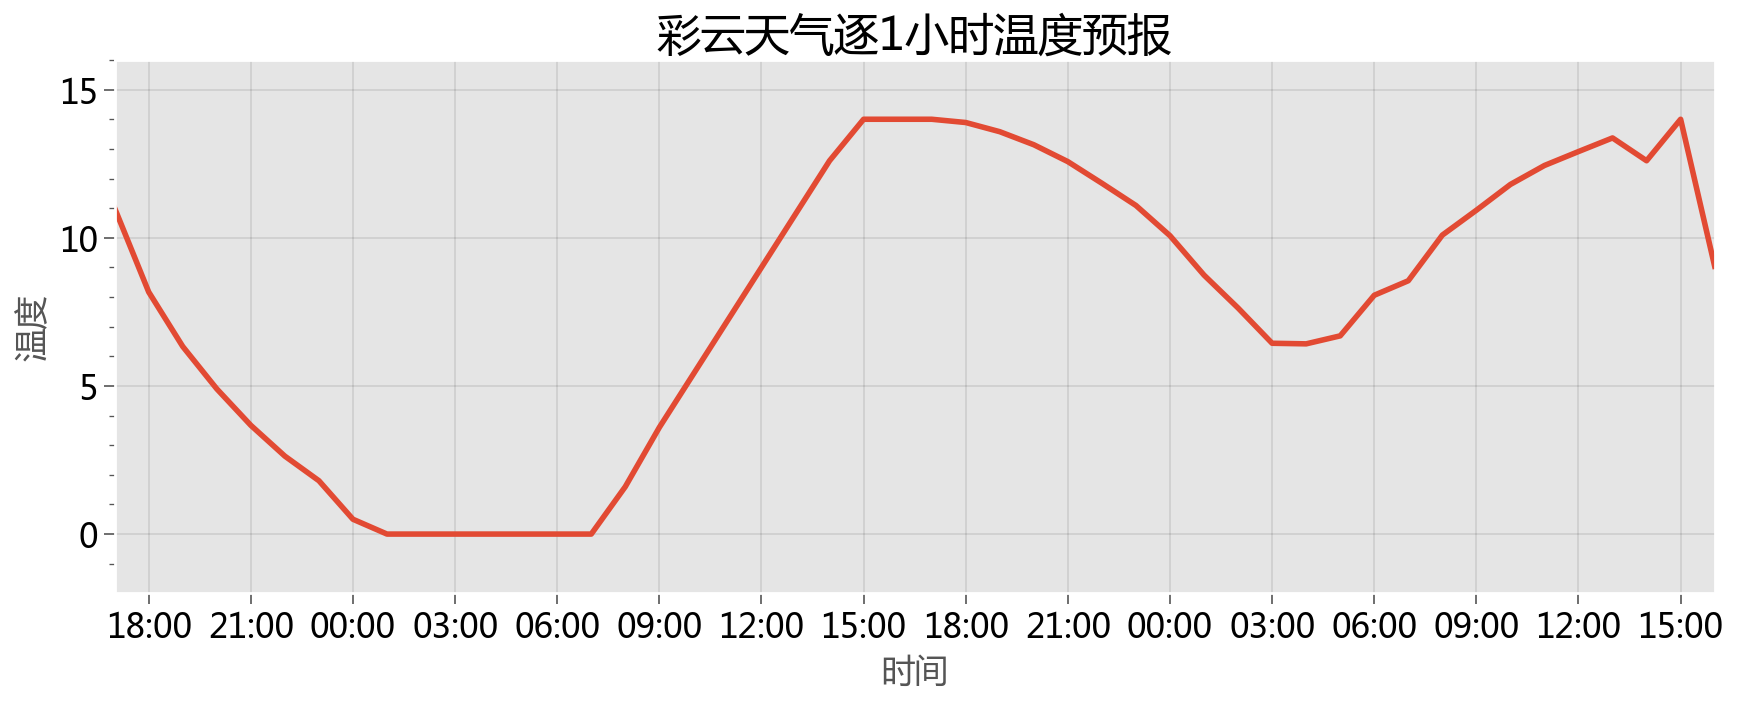

In [28]:
# Simple plot
with plt.style.context('ggplot'):
    plot.rc.update({'large': 16, 'small':12, 'fontname':"Microsoft YaHei", 'grid.color':'black'})
    plt.rcParams["timezone"] = "CST"
    f, axs = plot.subplots(ncols=1, axwidth=8, aspect=3)
    axs[0].plot(data['hourly']['datetime'], data['hourly']['temperature'], lw=2)
    axs[0].format(xticks=20, xtickminor=False)
    axs.format(title='彩云天气逐1小时温度预报',
               xlocator=('hour', range(0, 24, 3)), xrotation=0, xformatter='%H:%M',
               xlabel='时间', ylabel='温度', ylim=(-2, 16), )
    plot.rc.reset()

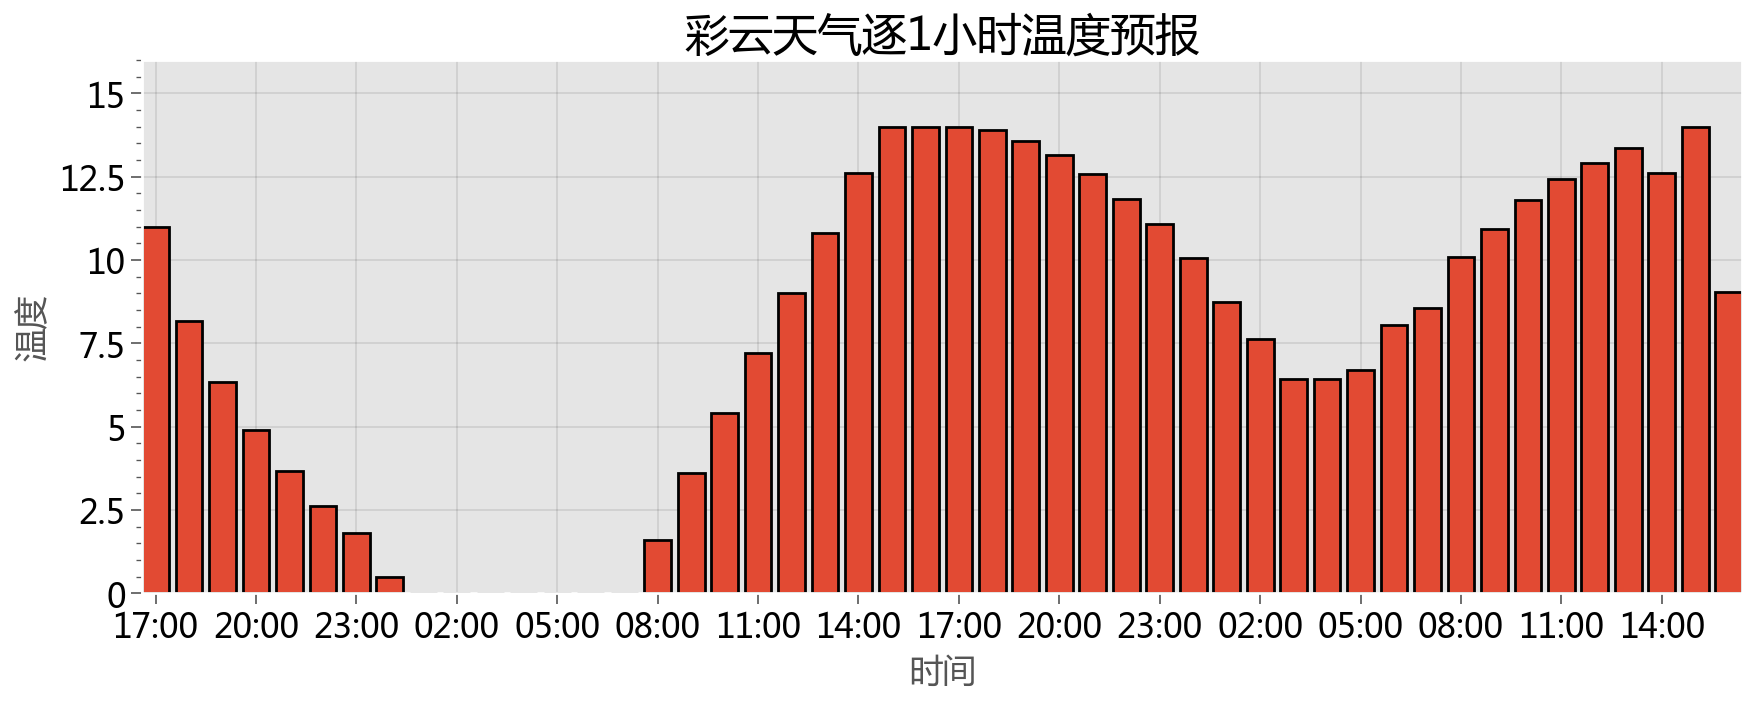

In [32]:
# Simple plot
with plt.style.context('ggplot'):
    plot.rc.update({'large': 16, 'small':12, 'fontname':"Microsoft YaHei", 'grid.color':'black'})
    f, axs = plot.subplots(ncols=1, axwidth=8, aspect=3)
    axs[0].bar(data['hourly']['datetime'].dt.strftime('%H:%M'), data['hourly']['temperature'], linewidth=1)
    axs[0].format(xticks=20, xtickminor=False)
    axs.format(title='彩云天气逐1小时温度预报', xlocator=3,
               xlabel='时间', ylabel='温度', ylim=(0, 16), )
    plot.rc.reset()

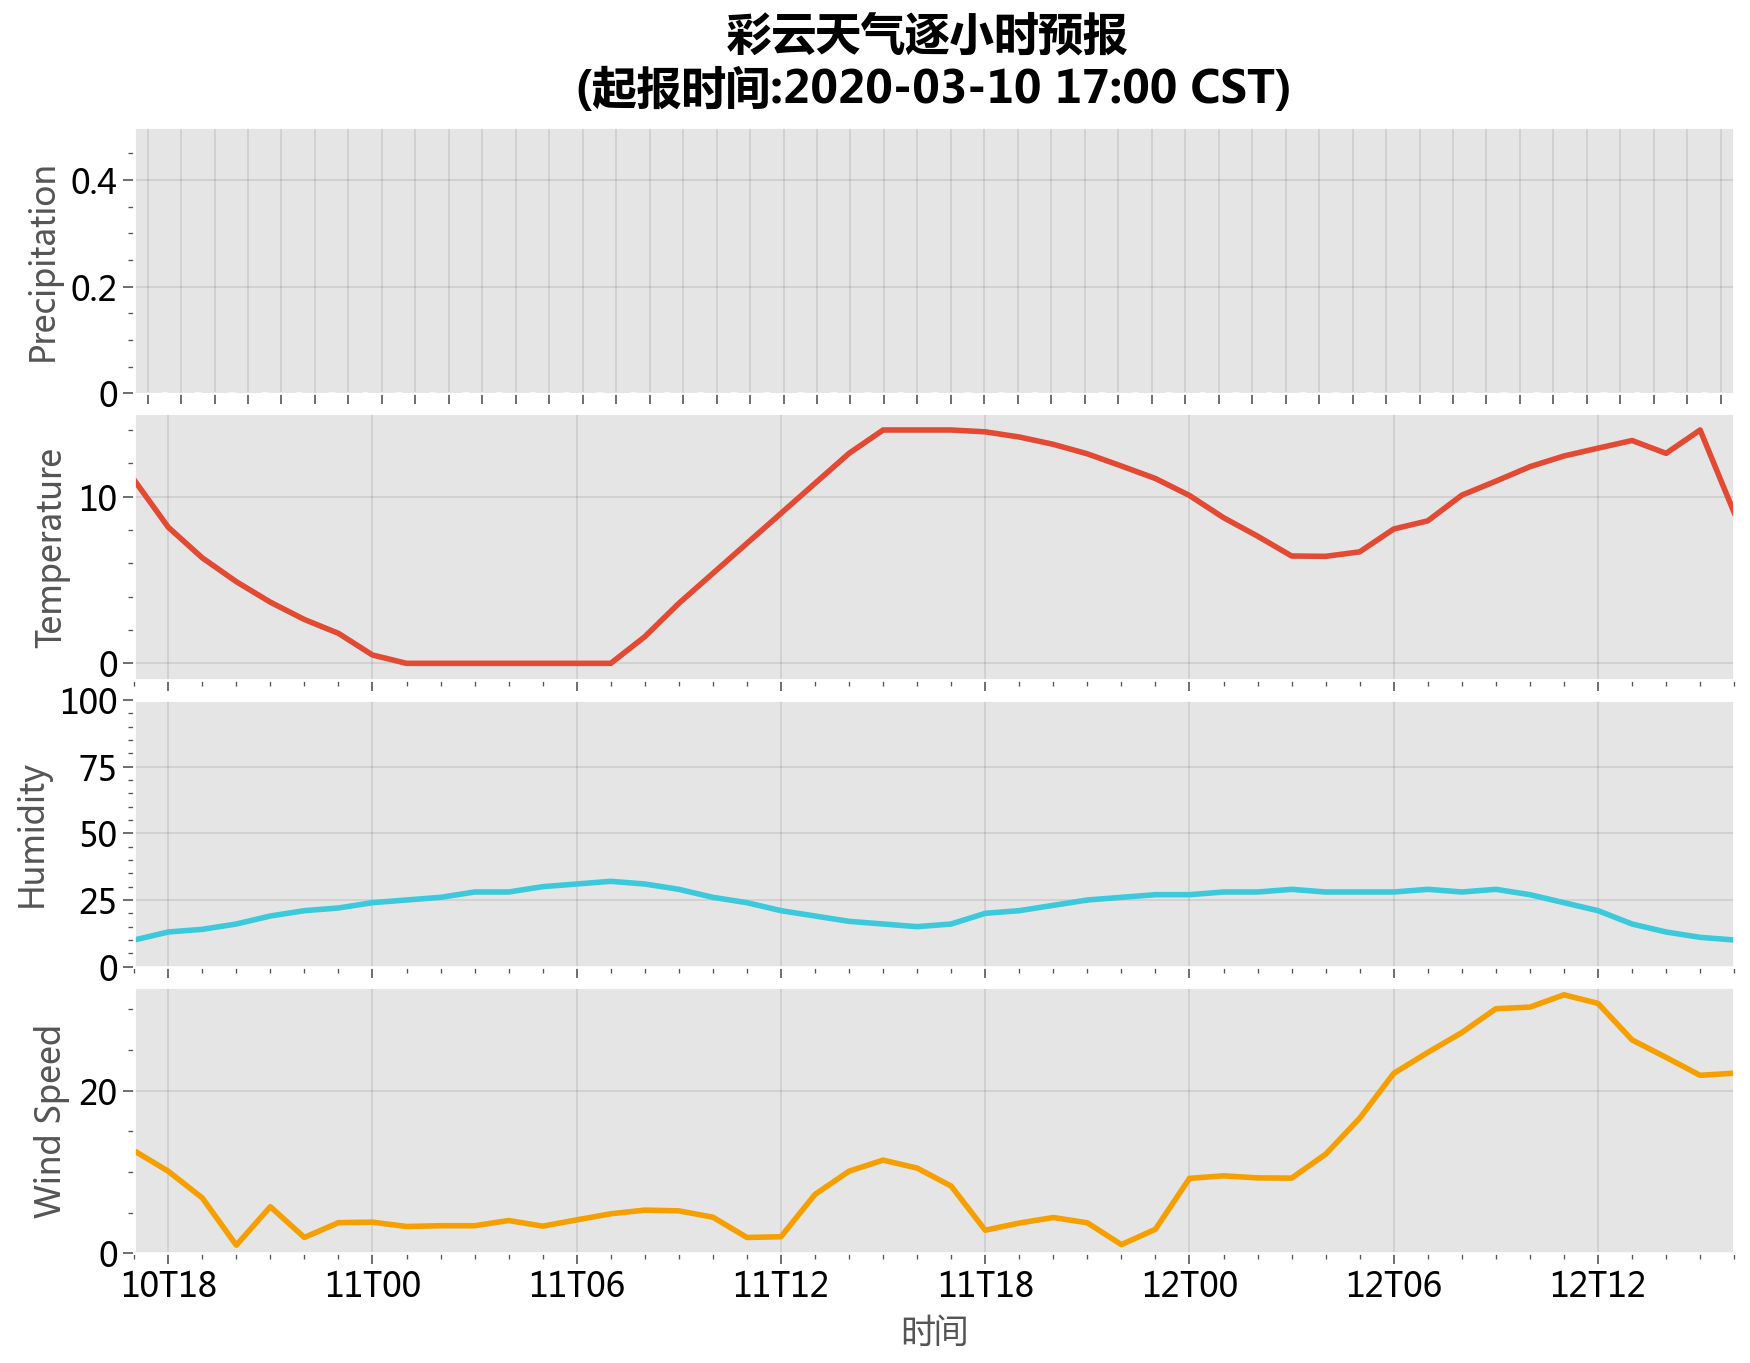

In [44]:
# Simple plot
with plt.style.context('ggplot'):
    plot.rc.update({'large': 16, 'small':12, 'fontname':"Microsoft YaHei", 'grid.color':'black'})
    plt.rcParams["timezone"] = "CST"
    f, axs = plot.subplots(ncols=1, nrows=4, axwidth=8, aspect=6, share=0, hspace=(0.1, 0.1, 0.1))
    
    axs[0].bar(data['hourly']['datetime'].dt.strftime('%H:%M'), data['hourly']['precipitation'], linewidth=1)
    axs[0].format(xlabel="", ylabel="Precipitation", ylim=(0,max(data['hourly']['precipitation'].max(), 0.5)), 
                  xticklabels="null", xlocator=1)
    
    axs[1].plot(data['hourly']['datetime'], data['hourly']['temperature'], lw=2)
    axs[1].format(xlabel="", ylabel="Temperature", ylim=(data['hourly']['temperature'].min()-1, data['hourly']['temperature'].max()+1),
                  xlocator=('hour', range(0, 24, 6)), xticklabels="null", xminorlocator='hour')
    
    axs[2].plot(data['hourly']['datetime'], data['hourly']['humidity']*100, lw=2, color='cyan4')
    axs[2].format(xlabel="", ylabel="Humidity", ylim=(0, 100),
                  xlocator=('hour', range(0, 24, 6)), xticklabels="null", xminorlocator='hour')
    
    axs[3].plot(data['hourly']['datetime'], data['hourly']['speed'], lw=2, color='yellow7')
    axs[3].format(xlabel="时间", ylabel="Wind Speed", 
                  ylim=(data['hourly']['speed'].min()-1, data['hourly']['speed'].max()+1),
                  xlocator=('hour', range(0, 24, 6)), xrotation=0, xformatter='%dT%H',
                  xminorlocator='hour')
    axs.format(suptitle="彩云天气逐小时预报 \n 起报时间:("+data['hourly']['datetime'].min().strftime("%Y-%m-%d %H:%M %Z")+")")
    
    plot.rc.reset()

## 未来5天逐日预报数据

In [56]:
data['daily'].head()

,date,sunrise.time,sunset.time,precipitation_max,precipitation_24h,temperature_max,temperature_min,temperature_avg,max.speed,max.direction,min.speed,min.direction,avg.speed,avg.direction,humidity_max,humidity_min,humidity_avg,cloudrate_max,cloudrate_min,cloudrate_avg,pressure_max,pressure_min,pressure_avg,visibility_max,visibility_min,visibility_avg,dswrf_max,dswrf_min,dswrf_avg,aqi.max.chn,aqi.max.usa,aqi.avg.chn,aqi.avg.usa,aqi.min.chn,aqi.min.usa,pm25.max,pm25.avg,pm25.min,skycon,skycon_08h_20h,skycon_20h_32h,ultraviolet.index,ultraviolet.desc,carWashing.index,carWashing.desc,dressing.index,dressing.desc,comfort.index,comfort.desc,coldRisk.index,coldRisk.desc
0,2020-03-10 00:00:00+08:00,06:33,18:15,0.0,0.0,12.0,-2.0,7.14,24.99,335.25,1.39,83.88,12.79,328.83,0.26,0.11,0.15,1.00,0.0,0.38,101754.31,101354.31,101381.28,30.0,24.13,30.00,640.7,0.0,256.6,69,69,17.89,17.89,9,9,33,11.56,6,PARTLY_CLOUDY_DAY,CLEAR_DAY,CLEAR_NIGHT,4,强,1,适宜,6,冷,7,冷,4,极易发
1,2020-03-11 00:00:00+08:00,06:31,18:16,0.0,0.0,14.0,0.0,6.98,11.52,227.24,1.12,153.70,4.80,185.28,0.33,0.15,0.24,0.29,0.0,0.05,101434.31,100633.09,101025.01,30.0,10.34,22.00,639.7,0.0,236.8,80,80,57.96,57.96,27,27,59,41.71,19,CLEAR_DAY,CLEAR_DAY,CLEAR_NIGHT,4,强,1,适宜,6,冷,7,冷,4,极易发
2,2020-03-12 00:00:00+08:00,06:29,18:17,0.0,0.0,14.0,-2.4,7.55,32.23,1.34,9.09,5.96,19.35,5.84,0.29,0.10,0.21,1.00,0.0,0.59,102553.05,100714.31,101555.44,30.0,30.00,30.00,622.8,0.0,201.2,20,20,8.62,8.62,4,4,14,6.00,3,PARTLY_CLOUDY_DAY,PARTLY_CLOUDY_DAY,PARTLY_CLOUDY_NIGHT,1,最弱,1,适宜,7,寒冷,7,冷,4,极易发
3,2020-03-13 00:00:00+08:00,06:28,18:18,0.0,0.0,9.0,-3.0,4.40,16.92,20.22,4.61,333.92,11.72,266.97,0.21,0.07,0.14,0.96,0.0,0.21,102797.03,101834.27,102360.28,30.0,13.64,24.04,669.7,0.0,252.3,71,71,53.92,53.92,23,23,52,38.67,16,PARTLY_CLOUDY_DAY,CLEAR_DAY,PARTLY_CLOUDY_NIGHT,4,强,1,适宜,7,寒冷,7,冷,4,极易发
4,2020-03-14 00:00:00+08:00,06:26,18:19,0.0,0.0,14.0,-1.0,6.99,28.94,334.32,8.88,334.10,15.07,317.97,0.24,0.13,0.18,0.97,0.0,0.32,101754.31,101114.31,101441.19,30.0,30.00,30.00,650.2,0.0,232.5,44,44,26.33,26.33,4,4,31,18.50,3,PARTLY_CLOUDY_DAY,PARTLY_CLOUDY_DAY,CLEAR_NIGHT,1,最弱,1,适宜,7,寒冷,7,冷,4,极易发
